## Index: 
1. Scripts for running batch_igt_stats.x
2. Merging old and new outputs for batch_igt_stats.x 
3. Summing the different regions to see how many are completely outside ROIs / not fully inside ROIs
4. Writing these out to different .csv files for inspection 
5. Exploratory analysis for finding range of thresholds for assigning biopsies to CEL 
6. Adding in whether a biopsy is inside CEL or not
7. Exploratory analysis for finding range of thresholds for assigning biopsies to T2all lesion
8. Adding in whether a biopsy is inside T2all or not
9. Exploratory analysis for finding range of thresholds for assigning biopsies to NEC lesion
10. Adding in whether a biopsy is inside NEC or not
11. Reordering for insertion in Biopsy Annotation easily


## 1. Scripts for running batch_igt_stats.x

In [1]:
getwd()

[1] "/home/sf673542/DataWrangling/GetMergeData"

In [2]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)

In [3]:
setwd("/home/sf673542/DataWrangling/GetMergeData/July2018/")

In [4]:
list.files()

[1] "ajnr_bnum_tnum.95.csv"                                    
 [2] "anat.csv"                                                 
 [3] "biopsies_less100more50inROIs_to_check.csv"                
 [4] "biopsies_less50more0inROIs_to_check.csv"                  
 [5] "biopsies_less95more50inROIs_to_check.csv"                 
 [6] "biopsies_outside_rois_to_check.csv"                       
 [7] "bnum_tnum_forIGTstats_olddata.129.csv"                    
 [8] "bnum_tnum_newdata_fit_failed_for_batch_perf_biopsy.16.csv"
 [9] "diffu1000.csv"                                            
[10] "diffu2000.csv"                                            
[11] "new_data_fit_failed_to_janine.csv"                        
[12] "new.call_getigtstats.07062018.csv"                        
[13] "oldData_updatedColnames.csv"                              
[14] "olddata_updatedPerf_updatedColnames.csv"                  
[15] "out_batch_perf_biopsy.16.csv"                             
[16] "out_callIGTstats_old.csv"                                 
[17] "out_callIGTstats_rechgg.csv"                              
[18] "pathology_report_072018.csv"                              
[19] "pathology_report.csv"                                     
[20] "perf_biopsy_notes_lastrun.csv"                            
[21] "perf.csv"                                                 
[22] "researchpath_withInVivo_oldP01_updatedPERF.apr21.csv"     
[23] "researchPath_withInVivoData.csv"                          
[24] "spec.csv"

We will use the ajnr_bnum_tnum.95.csv to run batch_igt_stats.x on:

In [5]:
## I edited the batch_igt_stats.x and the get_igtStats.R to include ".dev.csv" 
## This is to account for the new igt_stats.dev 
## Then run: 
#batch_igt_stats.x /home/sf673542/DataWrangling/GetMergeData/July2018/ajnr_bnum_tnum.95.csv

## I edited the oldgli_get_igtStats.R to include ".dev.csv" 
## I also edited batch_igt_stats_oldgli.x to include ".dev.csv"
## Then run: batch_igt_stats_oldgli.x /home/sf673542/DataWrangling/GetMergeData/July2018/bnum_tnum_forIGTstats_olddata.129.csv

In [6]:
## Now I want to get the output & ensure it looks OK: 
# Rscript /home/sf673542/pushed_scripts/Rscript/oldgli_call_igtStats.R /home/sf673542/DataWrangling/GetMergeData/July2018/bnum_tnum_forIGTstats_olddata.129.csv /home/sf673542/DataWrangling/GetMergeData/July2018/out_callIGTstats_old.csv

In [7]:
## There is an error in the script that says: Error in read.table(file = file, header = header, sep = sep, quote = quote,  no lines available in input
## Let's see why: 
## NOTE: The error arises from vialIDs with a single digit in its first two, taht is named 01B65 instead of 1B65 for example.
## Must go into the perf_biopsy folder & rename these.
## Re-run igt_stats.dev in there, then it's all good.

In [8]:
## Everything is working well now. Time to collect data from the new igt_stats.dev in new data: 
# Rscript /home/sf673542/pushed_scripts/Rscript/call_getigtStats.R /home/sf673542/DataWrangling/GetMergeData/July2018/ajnr_bnum_tnum.95.csv /home/sf673542/DataWrangling/GetMergeData/July2018/out_callIGTstats_rechgg.csv

In [9]:
## Now let's inspect the data: 

## 2. Merging old and new outputs for batch_igt_stats.x 


In [10]:
rechgg_igtstats = read.csv("out_callIGTstats_rechgg.csv")

In [11]:
oldpo1_igtstats = read.csv("out_callIGTstats_old.csv")

In [12]:
head(rechgg_igtstats)
dim(rechgg_igtstats)
head(oldpo1_igtstats)
dim(oldpo1_igtstats)

tnum,sfnum,vialID,index,X.CEL,X.NEL,X.NEC
NA,NA,NA,NA,NA,NA,NA
t8773,sf9727,61B60,1,4.26,85.11,NA
t8773,sf9727,62B60,2,47.62,52.38,NA
t8773,sf9727,63B60,3,2.38,30.95,NA
t8783,sf9739,31B61,1,0.00,0.00,NA
t8783,sf9739,33B61,2,100.00,0.00,NA


[1] 259   7

tnum,sfnum,vialID,index,X.CEL,X.NEL,X.NEC
NA,NA,NA,NA,NA,NA,NA
t6369,sf8122,10B28,1,53.85,46.15,NA
t6369,sf8122,17B28,2,0.00,100.00,NA
t6369,sf8122,3B28,3,93.33,6.67,NA
t5317,sf7679,11B16,1,100.00,0.00,NA
t5317,sf7679,12B16,2,100.00,0.00,NA


[1] 240   7

In [13]:
rechgg_igtstats=rechgg_igtstats[-1,]
oldpo1_igtstats=oldpo1_igtstats[-1,]

In [14]:
head(rechgg_igtstats)
dim(rechgg_igtstats)
head(oldpo1_igtstats)
dim(oldpo1_igtstats)


,tnum,sfnum,vialID,index,X.CEL,X.NEL,X.NEC
2,t8773,sf9727,61B60,1,4.26,85.11,NA
3,t8773,sf9727,62B60,2,47.62,52.38,NA
4,t8773,sf9727,63B60,3,2.38,30.95,NA
5,t8783,sf9739,31B61,1,0.00,0.00,NA
6,t8783,sf9739,33B61,2,100.00,0.00,NA
7,t8869,sf9795,65B60,1,100.00,0.00,NA


[1] 258   7

,tnum,sfnum,vialID,index,X.CEL,X.NEL,X.NEC
2,t6369,sf8122,10B28,1,53.85,46.15,NA
3,t6369,sf8122,17B28,2,0.00,100.00,NA
4,t6369,sf8122,3B28,3,93.33,6.67,NA
5,t5317,sf7679,11B16,1,100.00,0.00,NA
6,t5317,sf7679,12B16,2,100.00,0.00,NA
7,t7408,sf8701,11B40,1,8.70,13.04,NA


[1] 239   7

In [15]:
igtstats = rbind(oldpo1_igtstats, rechgg_igtstats)

## 3. Summing the different regions to see how many are completely outside ROIs / not fully inside ROIs


In [16]:
sum_regions = c()
for(i in 1:dim(igtstats)[1]){
    if(is.na(igtstats$X.CEL[i]) & is.na(igtstats$X.NEL[i]) & is.na(igtstats$X.NEC[i])){
        sum_regions[i]= NA
    }
    else if(is.na(igtstats$X.CEL[i]) & is.na(igtstats$X.NEL[i]) & !is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.NEC[i]
    }
    else if(is.na(igtstats$X.CEL[i]) & !is.na(igtstats$X.NEL[i]) & is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.NEL[i]
    }
    else if(!is.na(igtstats$X.CEL[i]) & is.na(igtstats$X.NEL[i]) & is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.CEL[i]
    }
    else if(!is.na(igtstats$X.CEL[i]) & !is.na(igtstats$X.NEL[i]) & is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.CEL[i]+igtstats$X.NEL[i]
    }
    else if(!is.na(igtstats$X.CEL[i]) & is.na(igtstats$X.NEL[i]) & !is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.CEL[i]+igtstats$X.NEC[i]
    }
    else if(is.na(igtstats$X.CEL[i]) & !is.na(igtstats$X.NEL[i]) & !is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.NEL[i]+igtstats$X.NEC[i]
    }
    else if(!is.na(igtstats$X.CEL[i]) & !is.na(igtstats$X.NEL[i]) & !is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.CEL[i]+igtstats$X.NEL[i]+igtstats$X.NEC[i]
    }
}

In [17]:
table(sum_regions==100)
table(sum_regions==0)
table(sum_regions<100)
table(sum_regions>100.1)
length(sum_regions)



FALSE  TRUE 
  213   257 


FALSE  TRUE 
  443    27 


FALSE  TRUE 
  263   207 


FALSE  TRUE 
  468     2 

[1] 497

In [18]:
igtstats = data.frame(igtstats, sum = sum_regions)

In [19]:
igtstats[which(igtstats$sum ==0),]

,tnum,sfnum,vialID,index,X.CEL,X.NEL,X.NEC,sum
22,t7584,sf8842,14B44,1,0,0,NA,0
28,t8070,sf7540,18B13,1,0,NA,NA,0
29,t8070,sf7540,26B13,2,0,NA,NA,0
55,t7555,sf8808,29B43,1,0,0,NA,0
58,t7555,sf8808,32B43,4,0,0,NA,0
77,t7227,sf8580,37B39,3,0,0,NA,0
117,t5550,sf7732,56B17,2,0,0,NA,0
140,t6929,sf8425,62B35,3,0,0,NA,0
143,t7225,sf8582,62B39,1,0,0,NA,0
144,t7225,sf8582,63B39,2,0,0,NA,0


## 4. Writing these out to different .csv files for inspection 


In [20]:
## I looked at some (t7055 & t5880) and it seems that these are just 
## poorly drawn ROIs, I'm wondering what to do with all that.. 
write.csv(igtstats[which(igtstats$sum ==0),], "biopsies_outside_rois_to_check.csv", row.names = F)

In [21]:
## Looking at those with less than 100 %, let's see which ones are under 50 % and see what the problem might be there: 
write.csv(igtstats[which(igtstats$sum<50 & igtstats$sum>0),], "biopsies_less50more0inROIs_to_check.csv", row.names = F) 
write.csv(igtstats[which(igtstats$sum>50 & igtstats$sum<95),], "biopsies_less95more50inROIs_to_check.csv", row.names = F) 


## 5. Exploratory analysis for finding range of thresholds for assigning biopsies to CEL 


In [22]:
getwd()

[1] "/home/sf673542/DataWrangling/GetMergeData/July2018"

In [23]:
rechgg_igtstats = read.csv("out_callIGTstats_rechgg.csv")
oldpo1_igtstats = read.csv("out_callIGTstats_old.csv")

In [24]:
igtstats = rbind(oldpo1_igtstats, rechgg_igtstats)
sum_regions = c()
for(i in 1:dim(igtstats)[1]){
    if(is.na(igtstats$X.CEL[i]) & is.na(igtstats$X.NEL[i]) & is.na(igtstats$X.NEC[i])){
        sum_regions[i]= NA
    }
    else if(is.na(igtstats$X.CEL[i]) & is.na(igtstats$X.NEL[i]) & !is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.NEC[i]
    }
    else if(is.na(igtstats$X.CEL[i]) & !is.na(igtstats$X.NEL[i]) & is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.NEL[i]
    }
    else if(!is.na(igtstats$X.CEL[i]) & is.na(igtstats$X.NEL[i]) & is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.CEL[i]
    }
    else if(!is.na(igtstats$X.CEL[i]) & !is.na(igtstats$X.NEL[i]) & is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.CEL[i]+igtstats$X.NEL[i]
    }
    else if(!is.na(igtstats$X.CEL[i]) & is.na(igtstats$X.NEL[i]) & !is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.CEL[i]+igtstats$X.NEC[i]
    }
    else if(is.na(igtstats$X.CEL[i]) & !is.na(igtstats$X.NEL[i]) & !is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.NEL[i]+igtstats$X.NEC[i]
    }
    else if(!is.na(igtstats$X.CEL[i]) & !is.na(igtstats$X.NEL[i]) & !is.na(igtstats$X.NEC[i])){
        sum_regions[i]=igtstats$X.CEL[i]+igtstats$X.NEL[i]+igtstats$X.NEC[i]
    }
}
igtstats = data.frame(igtstats, sum = sum_regions)

In [25]:
igtstats = igtstats[-1,]

In [26]:
head(igtstats)

,tnum,sfnum,vialID,index,X.CEL,X.NEL,X.NEC,sum
2,t6369,sf8122,10B28,1,53.85,46.15,NA,100.00
3,t6369,sf8122,17B28,2,0.00,100.00,NA,100.00
4,t6369,sf8122,3B28,3,93.33,6.67,NA,100.00
5,t5317,sf7679,11B16,1,100.00,0.00,NA,100.00
6,t5317,sf7679,12B16,2,100.00,0.00,NA,100.00
7,t7408,sf8701,11B40,1,8.70,13.04,NA,21.74


In [27]:
table(igtstats$X.CEL==100)


FALSE  TRUE 
  390    63 

Here I want to look at the range of CEL values (t1v) of these particular cases so that I can use that for thresholding (if possible) ... so therefore I must read in the values from anat.csv

In [28]:
data = read.csv("../../AnnotateData/Annot1_researchPath_withInVivoData.csv")
colnames(data)

[1] "b_number"                 "t_number"                
 [3] "sf_number"                "current_scan_date"       
 [5] "current_surgery_date"     "current_hist_grade"      
 [7] "current_hist_type"        "roi.label"               
 [9] "tumor_cell_evaluation"    "necrosis"                
[11] "f8_delicate"              "f8_simple"               
[13] "f8_complex"               "mib_1"                   
[15] "bx_pure_treatment_effect" "nfse"                    
[17] "nfl"                      "nt1c"                    
[19] "nt1v"                     "nadc.1"                  
[21] "nfa.1"                    "nev1.1"                  
[23] "nev2.1"                   "nev3.1"                  
[25] "nevrad.1"                 "nadc.2"                  
[27] "nfa.2"                    "nev1.2"                  
[29] "nev2.2"                   "nev3.2"                  
[31] "nevrad.2"                 "cbvn_nlin"               
[33] "phn_npar"                 "recovn_npar"             
[35] "cni"                      "ccri"                    
[37] "crni"                     "ncho"                    
[39] "ncre"                     "nnaa"                    
[41] "nlip"                     "nlac"                    
[43] "laclip"                   "olddata"                 
[45] "newdata"

In [29]:
anat_data = data[,c("t_number","roi.label","nfse", "nfl", "nt1c", "nt1v")]
dim(anat_data)

[1] 639   6

In [30]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [31]:
colnames(igtstats)[3]="roi.label"

In [32]:
data = full_join(anat_data, igtstats, by = "roi.label")

Warning message:
“Column `roi.label` joining factors with different levels, coercing to character vector”

In [33]:
dim(data)

[1] 650  13

In [34]:
head(data)

t_number,roi.label,nfse,nfl,nt1c,nt1v,tnum,sfnum,index,X.CEL,X.NEL,X.NEC,sum
6369,10B28,2.10,1.84,1.20,0.84,t6369,sf8122,1,53.85,46.15,NA,100.00
5317,11B16,2.27,1.44,1.88,0.78,t5317,sf7679,1,100.00,0.00,NA,100.00
8089,11B35,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7408,11B40,1.84,1.13,0.82,0.79,t7408,sf8701,1,8.70,13.04,NA,21.74
7540,11B43,2.35,1.97,0.76,0.78,t7540,sf8796,1,0.00,28.00,NA,28.00
5317,12B16,2.20,1.56,2.04,0.74,t5317,sf7679,2,100.00,0.00,NA,100.00


We want to know the range of the CEL values for those completely in the CEL region versus completely in the NEL. 

In [35]:
table(data$X.CEL>95 & data$X.CEL < 105)
table(data$X.NEL>95 & data$X.NEL < 105)
table(data$X.NEC>50 & data$X.NEC < 105)


FALSE  TRUE 
  381    76 


FALSE  TRUE 
  396    73 


FALSE  TRUE 
  133    11 

In [36]:
cel_t1c_vals = data$nt1c[data$X.CEL>95 & data$X.CEL < 105]
nel_t1c_vals = data$nt1c[data$X.NEL>95 & data$X.NEL < 105]



In [37]:
summary(cel_t1c_vals)
summary(nel_t1c_vals)

quantile(cel_t1c_vals, c(.1, .2, .3), na.rm=T)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.940   1.488   1.850   1.928   2.342   3.370     193 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.5300  0.7100  0.8400  0.8532  0.9500  1.4700     185 

10%   20%   30% 
1.255 1.350 1.565

In [38]:
cel_fl_vals = data$nfl[data$X.CEL>95 & data$X.CEL < 105]
nel_fl_vals = data$nfl[data$X.NEL>95 & data$X.NEL < 105]

In [39]:
summary(cel_fl_vals)
summary(nel_fl_vals)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.050   1.502   1.650   1.754   1.940   2.950     193 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.100   1.740   1.990   2.011   2.180   3.880     185 

### Accounting for multiple samples per patient in this comparison: 

In [40]:
colnames(data)

[1] "t_number"  "roi.label" "nfse"      "nfl"       "nt1c"      "nt1v"     
 [7] "tnum"      "sfnum"     "index"     "X.CEL"     "X.NEL"     "X.NEC"    
[13] "sum"

In [41]:
## beginning w/ CEL values and selecting the highest per patient: 
cel_t1c_vals.dat = data[!is.na(data$X.CEL) & data$X.CEL>95 & data$X.CEL < 105, c("t_number", "roi.label", "nt1c", "X.CEL")]
dim(cel_t1c_vals.dat)
cel_t1c_vals.dat


[1] 76  4

,t_number,roi.label,nt1c,X.CEL
2,5317,11B16,1.88,100.00
6,5317,12B16,2.04,100.00
8,6367,12B26,0.94,100.00
33,5603,21B18,1.63,100.00
50,6367,29B26,1.05,100.00
61,5682,31B19,1.67,100.00
63,6313,31B27,1.83,100.00
64,7555,31B43,1.70,100.00
83,5365,38B16,1.72,100.00
92,6415,3B29,1.21,95.24


In [42]:
cel_t1c_vals.dat=cel_t1c_vals.dat[order(-cel_t1c_vals.dat$nt1c),]

In [43]:
cel_t1c_vals.nodup = cel_t1c_vals.dat[!duplicated(cel_t1c_vals.dat$t_number),]
dim(cel_t1c_vals.nodup)

[1] 55  4

In [44]:
nel_t1c_vals.dat = data[!is.na(data$X.CEL) & data$X.NEL>95 & data$X.NEL < 105, c("t_number", "roi.label", "nt1c", "X.CEL")]
nel_t1c_vals.dat = nel_t1c_vals.dat[order(-nel_t1c_vals.dat$nt1c),]

In [45]:
head(nel_t1c_vals.dat)
dim(nel_t1c_vals.dat)
nel_t1c_vals.dat = nel_t1c_vals.dat[!duplicated(nel_t1c_vals.dat$t_number),]
dim(nel_t1c_vals.dat)

,t_number,roi.label,nt1c,X.CEL
507,10768,74B91,1.47,57.14
177,6020,70B23,1.39,0.00
494,10708,53B91,1.30,0.00
367,9085,85B66,1.29,4.65
530,11165,28B92,1.26,4.44
368,9085,87B66,1.17,0.00


[1] 68  4

[1] 46  4

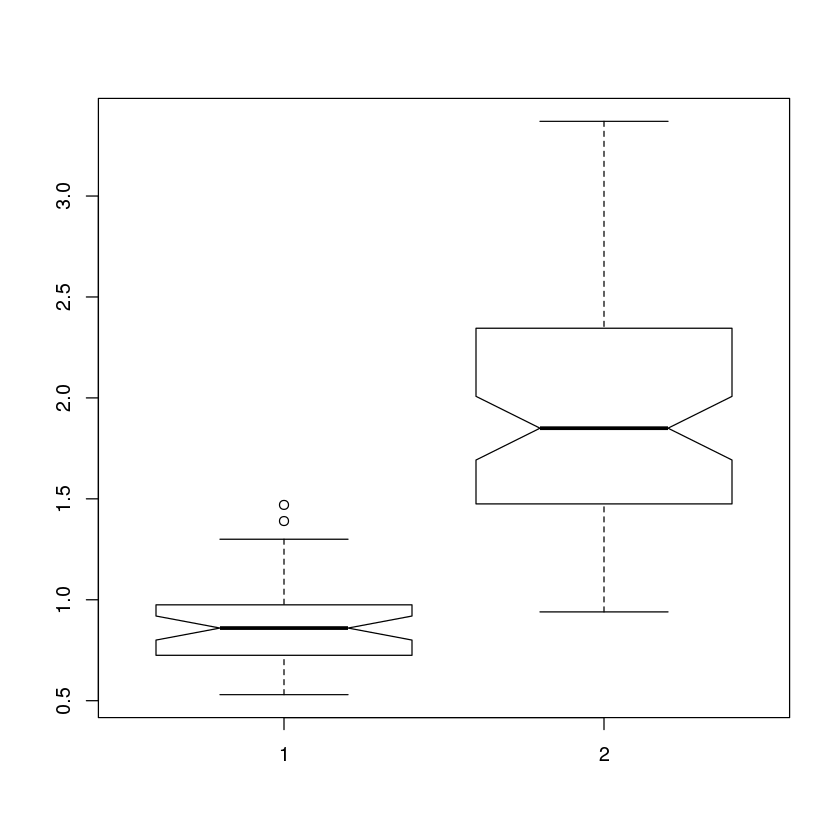

In [46]:
boxplot(nel_t1c_vals.dat$nt1c, cel_t1c_vals.dat$nt1c, notch = T)

In [47]:
summary(cel_t1c_vals.dat$nt1c)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.940   1.488   1.850   1.928   2.342   3.370 

In [48]:
summary(nel_t1c_vals.dat$nt1c)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.5300  0.7275  0.8600  0.8905  0.9725  1.4700       2 

## 6. Adding in whether a biopsy is inside CEL or not
#### We can make this assignment if it's "in" CEL or if its within the 1st - 3rd quartile? 

In [49]:
cel_data = data.frame(data, in_CEL = NA)

In [50]:
head(cel_data)

t_number,roi.label,nfse,nfl,nt1c,nt1v,tnum,sfnum,index,X.CEL,X.NEL,X.NEC,sum,in_CEL
6369,10B28,2.10,1.84,1.20,0.84,t6369,sf8122,1,53.85,46.15,NA,100.00,NA
5317,11B16,2.27,1.44,1.88,0.78,t5317,sf7679,1,100.00,0.00,NA,100.00,NA
8089,11B35,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7408,11B40,1.84,1.13,0.82,0.79,t7408,sf8701,1,8.70,13.04,NA,21.74,NA
7540,11B43,2.35,1.97,0.76,0.78,t7540,sf8796,1,0.00,28.00,NA,28.00,NA
5317,12B16,2.20,1.56,2.04,0.74,t5317,sf7679,2,100.00,0.00,NA,100.00,NA


In [51]:
## we want to include those with a normalized t1c value above 1.48 it should be in the CEL region
cel_data$in_CEL[which(cel_data$nt1c>1.48)]=1

In [52]:
table(cel_data$in_CEL)


  1 
163 

In [53]:
## also adding in percentages based on igt_stats
cel_data$in_CEL[which(cel_data$X.CEL > 49.9 & cel_data$X.NEL<50)]=1

In [54]:
table(cel_data$in_CEL)


  1 
231 

In [55]:
## now adding in if it's NOT in CEL region: 
cel_data$in_CEL = ifelse(is.na(cel_data$in_CEL), 0, 1)

In [56]:
table(cel_data$in_CEL)


  0   1 
419 231 

## 7. Exploratory analysis for finding range of thresholds for assigning biopsies to T2all lesion


Since it's normalized against NAWM, we should have a good idea of what it's like to be in a FLAIR hyperintense region if we just take a look at those that are certainly COMPLETELY in t2L

In [57]:
## finding things that are def in NEL: 
nel_fl_vals = data$nfl[data$X.NEL>95 & data$X.NEL < 105]

In [58]:
summary(nel_fl_vals)
quantile(nel_fl_vals, c(.1, .2, .3), na.rm = T)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.100   1.740   1.990   2.011   2.180   3.880     185 

10%   20%   30% 
1.566 1.670 1.798

In [59]:
## We can essentially say with confidence that if it's greater than 1.74, it's in the t2L
## we can also use the 10th percentile as a cutoff to see how that goes: 

## 8. Adding in whether a biopsy is inside NEL or not

In [60]:
t2_cel_data = data.frame(cel_data, in_T2all = NA)

In [61]:
t2_cel_data$in_T2all[which(t2_cel_data$nfl>1.25)]=1
t2_cel_data$in_T2all[which(t2_cel_data$X.NEL>50)]=1

## adding in zeros here: 
t2_cel_data$in_T2all=ifelse(is.na(t2_cel_data$in_T2all), 0, 1) 


In [62]:
table(t2_cel_data$in_T2all)


  0   1 
202 448 

In [63]:
nel_cel_data = data.frame(t2_cel_data, in_NEL = NA)
colnames(nel_cel_data)

[1] "t_number"  "roi.label" "nfse"      "nfl"       "nt1c"      "nt1v"     
 [7] "tnum"      "sfnum"     "index"     "X.CEL"     "X.NEL"     "X.NEC"    
[13] "sum"       "in_CEL"    "in_T2all"  "in_NEL"

In [64]:
nel_cel_data$in_NEL[which(nel_cel_data$in_T2all == 1 & nel_cel_data$in_CEL==0)]=1
nel_cel_data$in_NEL[which(nel_cel_data$X.NEL>40 & nel_cel_data$X.CEL <50)]=1


In [65]:
nel_cel_data$in_NEL = ifelse(is.na(nel_cel_data$in_NEL==1), 0, 1)

In [66]:
table(nel_cel_data$in_NEL)


  0   1 
386 264 

In [67]:
table(nel_cel_data$in_NEL)


  0   1 
386 264 

In [68]:
dim(nel_cel_data)

[1] 650  16

In [69]:
nel_cel_data[grep(10269, nel_cel_data$t_number),]

,t_number,roi.label,nfse,nfl,nt1c,nt1v,tnum,sfnum,index,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL
456,10269,29B90,1.61,1.81,0.80,0.83,t10269,sf10723,1,NA,100.00,NA,100.00,0,1,1
457,10269,87B80,2.74,1.28,0.57,0.64,t10269,sf10723,2,NA,68.09,NA,68.09,0,1,1
458,10269,90B80,2.08,1.84,0.88,0.71,t10269,sf10723,3,NA,100.00,NA,100.00,0,1,1


In [70]:
dim(data)

[1] 650  13

In [71]:
data = nel_cel_data

In [72]:
dim(data)
colnames(data)

[1] 650  16

[1] "t_number"  "roi.label" "nfse"      "nfl"       "nt1c"      "nt1v"     
 [7] "tnum"      "sfnum"     "index"     "X.CEL"     "X.NEL"     "X.NEC"    
[13] "sum"       "in_CEL"    "in_T2all"  "in_NEL"

In [73]:
data = data[!is.na(data$roi.label),]

In [74]:
dim(data)

[1] 649  16

## 9. Exploratory analysis for finding range of thresholds for assigning biopsies to NEC lesion

In [75]:
head(data)

t_number,roi.label,nfse,nfl,nt1c,nt1v,tnum,sfnum,index,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL
6369,10B28,2.10,1.84,1.20,0.84,t6369,sf8122,1,53.85,46.15,NA,100.00,1,1,0
5317,11B16,2.27,1.44,1.88,0.78,t5317,sf7679,1,100.00,0.00,NA,100.00,1,1,0
8089,11B35,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0
7408,11B40,1.84,1.13,0.82,0.79,t7408,sf8701,1,8.70,13.04,NA,21.74,0,0,0
7540,11B43,2.35,1.97,0.76,0.78,t7540,sf8796,1,0.00,28.00,NA,28.00,0,1,1
5317,12B16,2.20,1.56,2.04,0.74,t5317,sf7679,2,100.00,0.00,NA,100.00,1,1,0


In [76]:
data = data.frame(data, in_NEC = NA) 

### Here we're going to find out what the range of necrosis is: 

In [77]:
necdata = data[which(data$X.NEC>40 & data$X.CEL < 40),]

In [78]:
dim(necdata)

[1] 11 17

In [79]:
necdata

,t_number,roi.label,nfse,nfl,nt1c,nt1v,tnum,sfnum,index,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL,in_NEC
182,5944,71B22,3.89,1.68,1.20,0.58,t5944,sf7926,1,8.70,39.13,47.83,95.66,0,1,1,NA
214,6671,79B31,2.54,2.07,0.76,0.58,t6671,sf8263,1,33.33,14.29,52.38,100.00,0,1,1,NA
234,6671,82B31,2.90,1.50,0.72,0.65,t6671,sf8263,4,0.00,0.00,95.65,95.65,0,1,1,NA
269,6241,86B25,2.72,1.76,1.72,0.85,t6241,sf8076,2,36.36,0.00,63.64,100.00,1,1,0,NA
361,9063,82B64,3.38,1.54,0.62,0.67,t9063,sf10012,2,0.00,0.00,100.00,100.00,0,1,1,NA
391,9288,48B75,1.88,1.67,1.10,0.86,t9288,sf10199,2,0.00,0.00,100.00,100.00,0,1,1,NA
485,10655,7B91,1.33,1.40,0.94,0.94,t10655,sf10912,2,10.64,27.66,57.45,95.75,0,1,1,NA
544,11295,49B97,1.73,1.98,1.54,0.87,t11295,sf11196,2,22.50,0.00,77.50,100.00,1,1,0,NA
545,11318,50B97,2.51,2.53,0.82,0.73,t11318,sf11206,1,0.00,NA,77.78,77.78,0,1,1,NA
610,11876,11560-1,1.87,1.83,1.09,0.98,t11876,sf11560,1,17.78,28.89,53.33,100.00,0,1,1,NA


In [80]:
summary(necdata$nt1c)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.620   0.790   0.940   1.035   1.150   1.720 

In [81]:
summary(necdata$nfl)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.400   1.605   1.760   1.818   2.010   2.530 

In [82]:
## maybe it is safe to say that those w/ darkness on nt1c <.75 have necrosis 

In [83]:
potentialnecdata = data[which(data$nt1c<.75 & data$in_CEL==0 & data$in_NEL ==0) ,]

In [84]:
dim(potentialnecdata)

[1] 11 17

In [85]:
potentialnecdata

,t_number,roi.label,nfse,nfl,nt1c,nt1v,tnum,sfnum,index,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL,in_NEC
15,7394,14B41,4.23,1.03,0.51,0.52,t7394,sf8688,2,42.86,0,NA,42.86,0,0,0,NA
102,6556,46B30,9.46,0.37,0.29,0.36,t6556,sf8218,2,NA,NA,NA,NA,0,0,0,NA
110,6218,4B26,2.34,0.99,0.69,0.45,t6218,sf8057,2,7.69,0,30.77,38.46,0,0,0,NA
202,5728,76B19,3.33,0.83,0.70,NA,t5728,sf7818,2,0.00,0,0.00,0.00,0,0,0,NA
242,8068,8352 T4,4.10,1.10,0.66,1.04,NA,NA,NA,NA,NA,NA,NA,0,0,0,NA
282,7628,88B44,1.38,1.02,0.74,0.66,t7628,sf8873,2,0.00,0,NA,0.00,0,0,0,NA
298,6243,93B26,4.67,0.67,0.73,0.51,NA,NA,NA,NA,NA,NA,NA,0,0,0,NA
321,8775,1B61,0.00,0.00,0.00,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,NA
322,8775,2B61,0.00,0.00,0.00,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,NA
323,8775,3B61,0.00,0.00,0.00,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,NA


In [86]:
## Here I'm going to check a random one of these to see if it's really in necrotic regions
## Starting with 5728 - this one is in the cavity (so that we know there is brain shift here... can't take tissue from the cavity )
## Checked 5961, 58 seems to be in the t2L, 56 also in t2L, maybe b/c so close to cavity near orbits getting these values
## 6218 seems to be in necrosis 
## 6556 is in the cavity 
## 7934 is definitely in necrosis
## 8068 looks like it's definitely in the FLAIR 
## 5272 looks like its' in cavity 
## 7628 looks like it's in the lesion but really can't tell how to categorize this, probably not necrosis
## 6243 can't open 
## 8775 has issue

## doesn't look like we can call these necrosis 

## 10. Adding in whether a biopsy is inside NEC or not


In [87]:
data$in_NEC[which(data$X.NEC>20)]=1
data$in_NEC=ifelse(is.na(data$in_NEC), 0, 1)
table(data$in_NEC)


  0   1 
623  26 

## 11. Exploring whether things are looking as they should/we expect: 


In [88]:
head(data[which(data$in_CEL==1 & data$X.CEL==0),])

,t_number,roi.label,nfse,nfl,nt1c,nt1v,tnum,sfnum,index,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL,in_NEC
22,8070,18B13,1.72,1.11,2.31,1.14,t8070,sf7540,1,0,NA,NA,0.00,1,0,0,0
37,5656,23B18,1.79,1.50,2.72,1.77,t5656,sf7760,1,0,80.77,NA,80.77,1,1,1,0
128,5550,55B17,2.69,2.03,2.06,0.83,t5550,sf7732,1,0,86.96,NA,86.96,1,1,1,0
130,5550,56B17,2.27,1.83,2.17,0.92,t5550,sf7732,2,0,0.00,NA,0.00,1,1,0,0
156,7225,62B39,1.50,1.29,1.83,1.08,t7225,sf8582,1,0,0.00,NA,0.00,1,1,0,0
189,5577,73B17,0.95,1.24,1.55,1.07,t5577,sf7750,2,0,0.00,0,0.00,1,0,0,0


In [89]:
## all of these have issues with the ROI, not with the designation of CEL given the range of inputs. 
## great to know, now let's just make sure that all of the ones in NEL are all in NEL 

In [90]:
head(data[which(data$in_NEL ==1 & data$X.NEL ==0),])

,t_number,roi.label,nfse,nfl,nt1c,nt1v,tnum,sfnum,index,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL,in_NEC
23,5983,18B23,2.01,1.34,0.91,0.85,t5983,sf7949,1,33.33,0,NA,33.33,0,1,1,0
49,6274,28B27,1.53,1.27,0.84,1.04,t6274,sf8093,1,9.09,0,0.00,9.09,0,1,1,0
100,6274,44B27,1.51,1.26,0.90,0.98,t6274,sf8093,4,40.91,0,0.00,40.91,0,1,1,0
234,6671,82B31,2.90,1.50,0.72,0.65,t6671,sf8263,4,0.00,0,95.65,95.65,0,1,1,1
274,5668,87B18,0.66,1.28,0.94,NA,t5668,sf7793,3,0.00,0,0.00,0.00,0,1,1,0
325,8783,31B61,1.08,1.38,0.97,NA,t8783,sf9739,1,0.00,0,NA,0.00,0,1,1,0


In [91]:
## ok so the first one i inspected, 9288, is in necrosis. i don't think i took this into consideration above. we will have to go back and do that: 
## 10152 57 would have been in the NEL if drawn more liberally 


### Here we want to see if the biopsy is in an ROI at all: 

In [92]:
data = data.frame(data, in_ROI = NA)

In [93]:
data$in_ROI = ifelse(data$in_CEL==1 | data$in_NEL ==1 | data$in_NEC ==1, 1, 0)

In [94]:
table(data$in_ROI)


  0   1 
166 483 

In [95]:
## inspecting those that aren't in ROI:
data[which(data$in_ROI==0),]

,t_number,roi.label,nfse,nfl,nt1c,nt1v,tnum,sfnum,index,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL,in_NEC,in_ROI
3,8089,11B35,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,0
4,7408,11B40,1.84,1.13,0.82,0.79,t7408,sf8701,1,8.70,13.04,NA,21.74,0,0,0,0,0
9,8089,12B35,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,0
10,7408,12B40,1.87,0.96,0.91,0.87,t7408,sf8701,2,0.00,21.43,NA,21.43,0,0,0,0,0
12,8089,13B35,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,0
13,7394,13B41,2.42,1.07,1.11,0.90,t7394,sf8688,1,8.70,0.00,NA,8.70,0,0,0,0,0
14,6709,14B32,1.08,1.23,0.95,NA,t6709,sf8269,2,9.09,0.00,NA,9.09,0,0,0,0,0
15,7394,14B41,4.23,1.03,0.51,0.52,t7394,sf8688,2,42.86,0.00,NA,42.86,0,0,0,0,0
16,7584,14B44,3.34,0.85,1.08,0.72,t7584,sf8842,1,0.00,0.00,NA,0.00,0,0,0,0,0
18,6709,15B32,1.85,1.12,0.92,NA,t6709,sf8269,3,9.09,22.73,NA,31.82,0,0,0,0,0


In [96]:
## Many of these biopsies have zero value for nfse, meaning that biopsy_quant failed. Let's get rid of those & take another look: 
biopsyquant = data[!is.na(data$nfse),]
dim(biopsyquant)

[1] 527  18

In [97]:
dim(biopsyquant[which(biopsyquant$in_ROI==0),])

[1] 54 18

In [98]:
biopsyquant[which(biopsyquant$in_ROI==0),]

,t_number,roi.label,nfse,nfl,nt1c,nt1v,tnum,sfnum,index,X.CEL,X.NEL,X.NEC,sum,in_CEL,in_T2all,in_NEL,in_NEC,in_ROI
4,7408,11B40,1.84,1.13,0.82,0.79,t7408,sf8701,1,8.70,13.04,NA,21.74,0,0,0,0,0
10,7408,12B40,1.87,0.96,0.91,0.87,t7408,sf8701,2,0.00,21.43,NA,21.43,0,0,0,0,0
13,7394,13B41,2.42,1.07,1.11,0.90,t7394,sf8688,1,8.70,0.00,NA,8.70,0,0,0,0,0
14,6709,14B32,1.08,1.23,0.95,NA,t6709,sf8269,2,9.09,0.00,NA,9.09,0,0,0,0,0
15,7394,14B41,4.23,1.03,0.51,0.52,t7394,sf8688,2,42.86,0.00,NA,42.86,0,0,0,0,0
16,7584,14B44,3.34,0.85,1.08,0.72,t7584,sf8842,1,0.00,0.00,NA,0.00,0,0,0,0,0
18,6709,15B32,1.85,1.12,0.92,NA,t6709,sf8269,3,9.09,22.73,NA,31.82,0,0,0,0,0
44,7553,25B43,0.66,0.54,1.11,0.87,t7553,sf8804,1,NA,NA,NA,NA,0,0,0,0,0
45,8070,26B13,1.44,0.99,0.86,0.84,t8070,sf7540,2,0.00,NA,NA,0.00,0,0,0,0,0
52,7555,29B43,1.49,1.25,0.81,0.81,t7555,sf8808,1,0.00,0.00,NA,0.00,0,0,0,0,0


## 12. Write out biopsies that are unaccounted for based on being inside of an ROI or not
#### (this can be used later for figuring out the most important biopsies to check on) 


In [99]:
getwd()

[1] "/home/sf673542/DataWrangling/GetMergeData/July2018"

In [100]:
write.csv(biopsyquant[which(biopsyquant$in_ROI==0),], "Biopsies_outside_of_ROIs_from_get_igt_stats.csv", row.names = F)

## 13. Write out IGT_stats in usable way for Biopsy Annotation! 

In [104]:
data.frame(index = 1:length(colnames(data)), colnames = colnames(data))

index,colnames
1,t_number
2,roi.label
3,nfse
4,nfl
5,nt1c
6,nt1v
7,tnum
8,sfnum
9,index
10,X.CEL


In [105]:
data_to_write = data[,c(1, 2, 10:18)]

In [106]:
write.csv(data_to_write, "igt_stats_information_forBiopsyAnnot.csv", row.names = F )